In [18]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Model 

In [2]:
dataset_path = '/kaggle/input/agriculture-crop-images/crop_images'
filenames = os.listdir(dataset_path)

In [3]:
filenames

['jute', 'maize', 'wheat', 'sugarcane', 'rice']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-10-25 13:55:41.138753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761400541.352544      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761400541.410166      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data_gen = ImageDataGenerator(
    zoom_range=0.1,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    rotation_range=90,
    validation_split=0.3
)


In [6]:
train_gen = data_gen.flow_from_directory(
    '/kaggle/input/agriculture-crop-images/kag2',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 563 images belonging to 5 classes.


In [7]:
val_gen = data_gen.flow_from_directory(
    '/kaggle/input/agriculture-crop-images/kag2',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 241 images belonging to 5 classes.


In [ ]:
train_gen.class_indices

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3

In [13]:
Inception1 = InceptionV3(weights='imagenet',include_top=False, input_shape=(128,128,3))

In [14]:
Inception1.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 63, 63,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 61, 61,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 61, 61,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 30, 30,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 30, 30,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 28, 28,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [15]:
for layer in Inception1.layers:
    layer.trainable = False
Inception1.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 63, 63,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 61, 61,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 61, 61,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 30, 30,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 30, 30,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 28, 28,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [16]:
final_layer = Dense(5,activation='softmax')(Flatten()(Inception1.output))

In [19]:
model = Model(inputs = Inception1.input, outputs = final_layer)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 63, 63,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 61, 61,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 61, 61,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 30, 30,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 30, 30,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 28, 28,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 21,843,749 (83.33 MB)

 Trainable params: 40,965 (160.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [20]:
history = model.fit(train_gen,epochs=50,validation_data=val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1761401530.252705     124 service.cc:148] XLA service 0x7a78c40047c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761401530.255509     124 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761401530.255544     124 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761401532.240649     124 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/18 ━━━━━━━━━━━━━━━━━━━━ 5:27 19s/step - accuracy: 0.2812 - loss: 2.7475

I0000 00:00:1761401537.826447     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3054 - loss: 3.2526 - val_accuracy: 0.2573 - val_loss: 3.5765
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.5103 - loss: 1.7824 - val_accuracy: 0.3568 - val_loss: 2.9619
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.5638 - loss: 1.2378 - val_accuracy: 0.3610 - val_loss: 2.9153
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.7144 - loss: 0.8959 - val_accuracy: 0.4149 - val_loss: 3.2441
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.7168 - loss: 0.8316 - val_accuracy: 0.3610 - val_loss: 2.9320
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.7032 - loss: 0.8582 - val_accuracy: 0.3527 - val_loss: 2.7215
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - accuracy: 0.7318 - loss: 0.7294 - val_accuracy: 0.3527 - val_loss: 3.5015
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.7549 - loss: 0.7790 - val_accuracy: 0.3776 - val_lo

In [21]:
model.save("Agriculture_model_Inception.h5")

In [22]:
import matplotlib.pyplot as plt

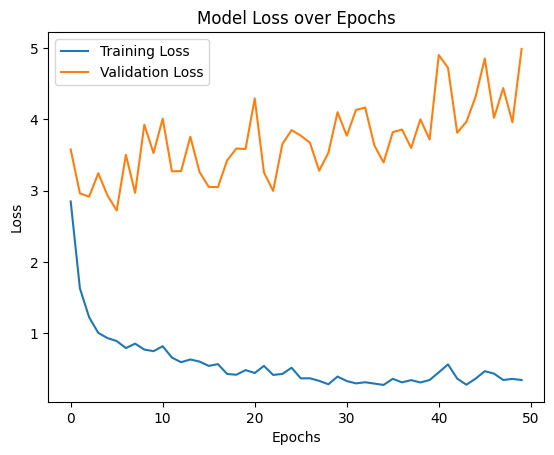

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

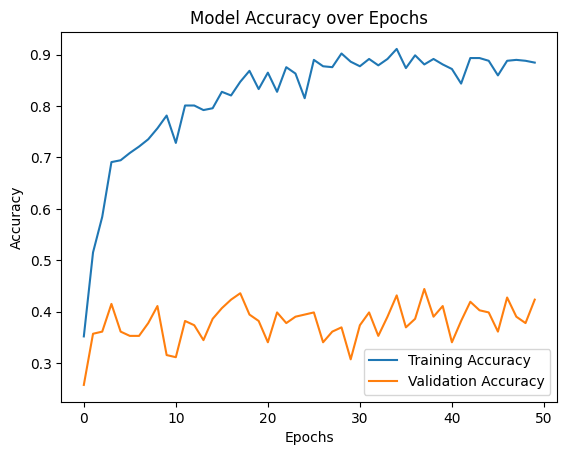

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Let's test on single image

import cv2

In [35]:
test_img = cv2.imread('/kaggle/input/unseen-images/sugarc_2.jpg')


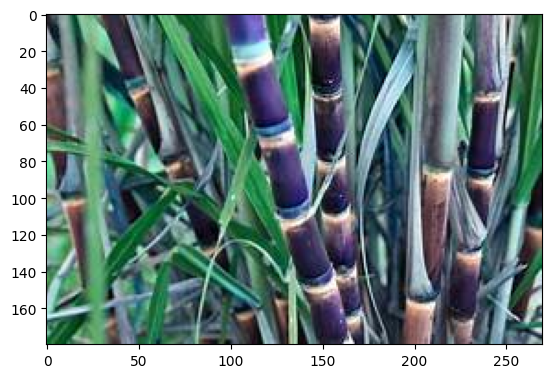

In [36]:
plt.imshow(test_img)

In [37]:
test_img = cv2.resize(test_img,(128,128))

In [38]:
test_input = test_img.reshape((1,128,128,3))

In [31]:
# 'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4

In [39]:
import numpy as np

prediction = model.predict(test_input)
class_names = ['jute', 'maize', 'rice', 'sugarcane' , 'wheat']

predicted_class = np.argmax(prediction)  # index of max value
print("Predicted:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted: wheat


In [ ]:
# wrong prediction done foe this image

In [ ]:
# testing on 25 unseen images

In [40]:
filenames = os.listdir('/kaggle/input/unseen-images')
filenames

['sugarc_5.jpg',
 'Jute_2.jpg',
 'sugarc_4.jpg',
 'Jute_1.jpg',
 'wheat_3.jpg',
 'maize_5.jpg',
 'wheat_2.jpg',
 'sugar_3.jpg',
 'Jute_5.jpg',
 'Jute_3.jpg',
 'rice_2.jpg',
 'rice_1.jpg',
 'sugarc_1.jpg',
 'maize_1.jpg',
 'maize_3.jpg',
 'sugarc_2.jpg',
 'wheat_1.jpg',
 'maize_2.jpg',
 'Jute_4.jpg',
 'rice_5.jpg',
 'rice_4.jpg',
 'wheat_4.jpg',
 'rice_3.jpg',
 'wheat_5.jpg',
 'maize_4.jpg']

In [41]:
import cv2
import os

for file in filenames[1:]:
    img_path = '/kaggle/input/unseen-images/' + file
    temp = cv2.imread(img_path, cv2.IMREAD_COLOR)  # 3 channels

    if temp is None:
        print(f"Cannot read {img_path}, skipping...")
        continue

    temp = cv2.resize(temp, (128,128))
    temp = temp / 255.0
    temp = temp.reshape(1,128,128,3)  # now it works

    yp = model.predict_on_batch(temp).argmax()
    print(file, "->", yp)


Jute_2.jpg -> 0
sugarc_4.jpg -> 3
Jute_1.jpg -> 1
wheat_3.jpg -> 3
maize_5.jpg -> 1
wheat_2.jpg -> 4
sugar_3.jpg -> 3
Jute_5.jpg -> 0
Jute_3.jpg -> 0
rice_2.jpg -> 3
rice_1.jpg -> 0
sugarc_1.jpg -> 3
maize_1.jpg -> 1
maize_3.jpg -> 0
sugarc_2.jpg -> 3
wheat_1.jpg -> 4
maize_2.jpg -> 3
Jute_4.jpg -> 3
rice_5.jpg -> 3
rice_4.jpg -> 4
wheat_4.jpg -> 1
rice_3.jpg -> 0
wheat_5.jpg -> 3
maize_4.jpg -> 1


In [43]:
# Accuracy

acc = 12/25*100
print("Accuarcy on unseen data is :",acc)

Accuarcy on unseen data is : 48.0


In [44]:
# out of 25 unseen images 12 wew identified correctly